In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [10]:
hr_data = pd.read_csv('C:/Users/hp/Downloads/HRDataset_v13.csv')
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               310 non-null    object 
 1   EmpID                       310 non-null    float64
 2   MarriedID                   310 non-null    float64
 3   MaritalStatusID             310 non-null    float64
 4   GenderID                    310 non-null    float64
 5   EmpStatusID                 310 non-null    float64
 6   DeptID                      310 non-null    float64
 7   PerfScoreID                 310 non-null    float64
 8   FromDiversityJobFairID      310 non-null    float64
 9   PayRate                     310 non-null    float64
 10  Termd                       310 non-null    float64
 11  PositionID                  310 non-null    float64
 12  Position                    310 non-null    object 
 13  State                       310 non

Data Cleaning

In [5]:
hr_data.dropna(how='all', inplace=True)

In [11]:
hr_data.RaceDesc.name = 'Racial group'
display(hr_data.RaceDesc.value_counts(),
        hr_data.RaceDesc.value_counts(normalize=True) * 100)

White                               193
Black or African American            57
Asian                                34
Two or more races                    18
American Indian or Alaska Native      4
Hispanic                              4
Name: Racial group, dtype: int64

White                               62.258065
Black or African American           18.387097
Asian                               10.967742
Two or more races                    5.806452
American Indian or Alaska Native     1.290323
Hispanic                             1.290323
Name: Racial group, dtype: float64

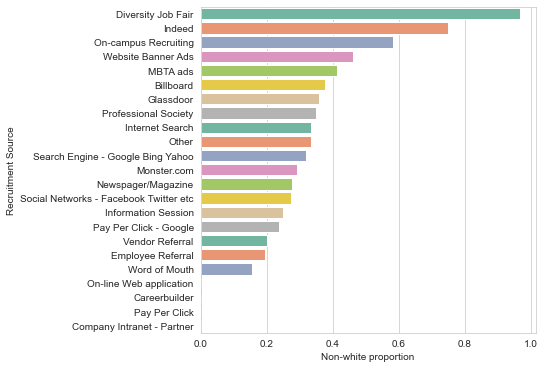

In [12]:
hr_data['Non-white'] = (hr_data['RaceDesc'] != 'White')
fig = plt.figure(figsize=(6, 6)), sns.set_style('whitegrid')
# Ordering for better visualization
ordered_nw = hr_data.groupby('RecruitmentSource')['Non-white'].mean().reset_index().sort_values('Non-white', ascending=False)
ax = sns.barplot(data=ordered_nw, y='RecruitmentSource', x='Non-white', palette='Set2')
ax.set_xlabel('Non-white proportion'), ax.set_ylabel('Recruitment Source');

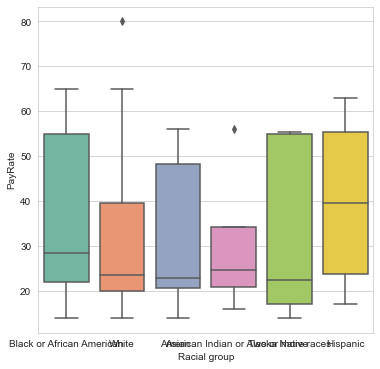

In [18]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(data=hr_data, x='RaceDesc', y='PayRate', palette='Set2')




C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


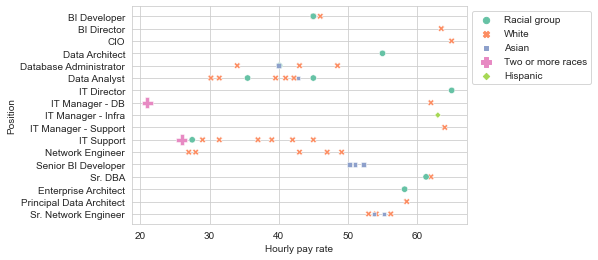

In [20]:
hr_data['Position'] = hr_data['Position'].str.strip()

ax = sns.scatterplot('PayRate', 'Position', 'RaceDesc', data=hr_data.loc[hr_data.Department=='IT/IS'],
                     palette='Set2', style='RaceDesc',size='RaceDesc', sizes=[40, 40, 40, 120, 40]);
ax.legend(bbox_to_anchor=(1, 1)).texts[0].set_text('Racial group'); ax.set_xlabel('Hourly pay rate'); 


In [21]:
position_rows = hr_data.Position.isin(['IT Support', 'IT Manager - DB'])
perf_indicators = ['RaceDesc','Position', 'PerformanceScore', 'SpecialProjectsCount', 'DaysLateLast30','EngagementSurvey']
it_is_lookup = hr_data.loc[position_rows, perf_indicators].sort_values(['Position','RaceDesc']).set_index('RaceDesc')
it_is_lookup

,Position,PerformanceScore,SpecialProjectsCount,DaysLateLast30,EngagementSurvey
RaceDesc,,,,,
Two or more races,IT Manager - DB,Fully Meets,6.0,NaN,2.51
White,IT Manager - DB,Fully Meets,7.0,0.0,2.96
Black or African American,IT Support,Fully Meets,5.0,0.0,4.30
Two or more races,IT Support,Exceeds,5.0,0.0,4.64
White,IT Support,Fully Meets,6.0,0.0,2.55
White,IT Support,Fully Meets,5.0,0.0,1.21
White,IT Support,Fully Meets,6.0,0.0,1.84
White,IT Support,Fully Meets,7.0,0.0,2.21
White,IT Support,Fully Meets,6.0,0.0,4.11


In [22]:
hr_data.loc[hr_data['Department'] == 'Executive Office'] 

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Non-white
73,"King, Janet",1.001495e+09,1.0,1.0,0.0,1.0,2.0,3.0,0.0,80.0,...,Board of Directors,9.0,Pay Per Click - Google,Fully Meets,4.83,3.0,0.0,1/17/2019,0.0,False


In [23]:

hr_data.replace({'Sex': {'F': 'Female', 'M ': 'Male'}}, inplace=True)
hr_data.Sex.name = 'Gender'
print(hr_data.Sex.value_counts(),'\n\n', (hr_data.Sex.value_counts(normalize=True) * 100), sep='')

Female    177
Male      133
Name: Gender, dtype: int64

Female    57.096774
Male      42.903226
Name: Gender, dtype: float64


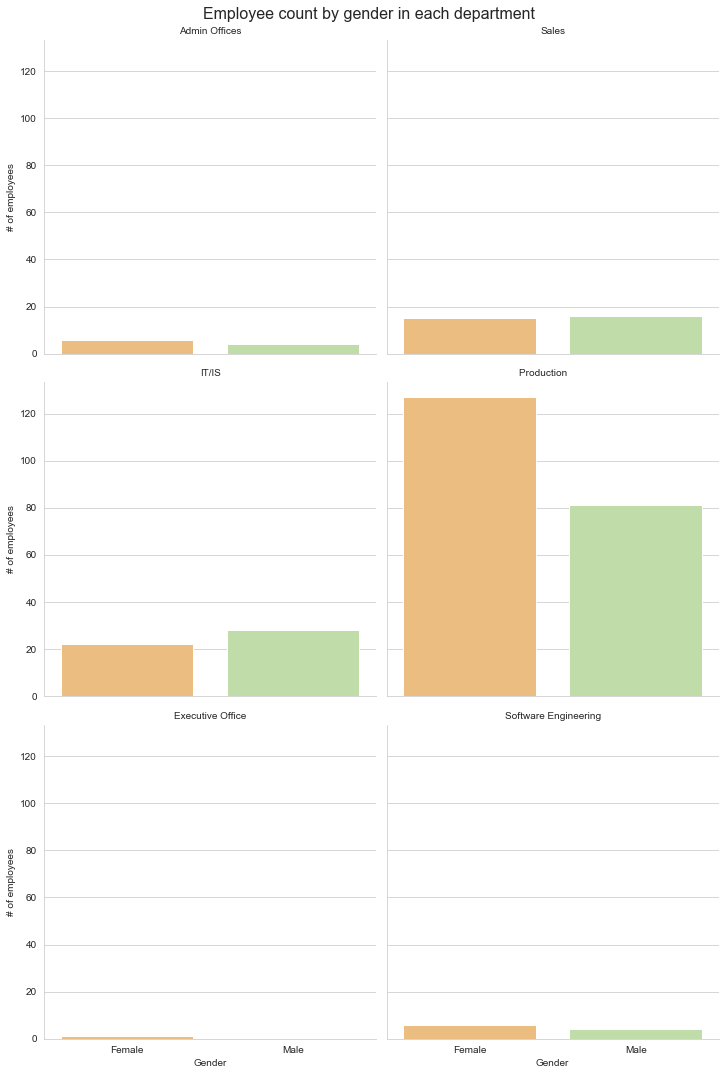

In [24]:
g = sns.catplot(data=hr_data, x='Sex', col='Department',
                col_wrap=2, palette='Spectral', kind='count')
g.set_xlabels('Gender'), g.set_ylabels('# of employees')
g.fig.suptitle(
    'Employee count by gender in each department', fontsize=16)
g.set_titles('{col_name}')
plt.subplots_adjust(top=0.95)

In [25]:
GenderPay = hr_data.groupby('Sex')[['PayRate']]
display(GenderPay.agg(['mean', 'median']))

PayRate       
             mean median
Sex                     
Female  29.472147   24.0
Male    33.697143   26.0

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (7).

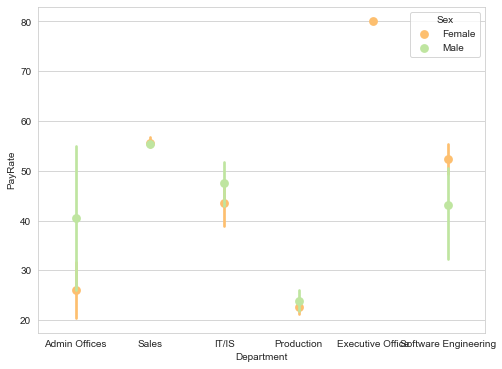

In [27]:
hr_data['Department'] = hr_data['Department'].str.strip()
plt.figure(figsize=(8, 6))
ax = sns.pointplot(data=hr_data, x='Department', y='PayRate',
                   hue='Sex', palette='Spectral' , join=False)
ax.set_xticklabels(hr_data.Department.unique(), rotation=45,
                   horizontalalignment='right');
ax.legend()
ax.set_title("Average pay rate by department"), ax.set_ylabel('Hourly pay rate');

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


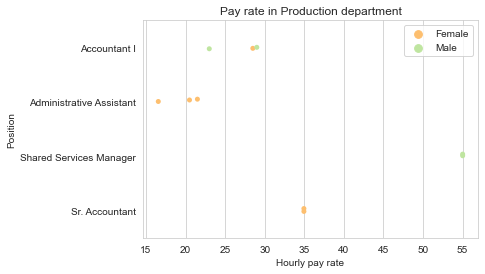

In [28]:
ax = sns.stripplot('PayRate', 'Position', hue='Sex',
                   data=hr_data[hr_data.Department == 'Admin Offices'],
                  palette='Spectral')
ax.set_xlabel('Hourly pay rate'), ax.set_title('Pay rate in Production department')
ax.legend();